In [2]:
# Import related modules
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.linear_model import LinearRegression
from sklearn.linear_model  import LogisticRegression
import pickle
import collections
from sklearn import tree

## Load Data

In [162]:
raw = pd.read_csv('./raw_dict/bsp_up75_random_gen_new_sort_random.csv')

raw = raw.drop(columns=['name'])

raw.head()

,height,width,nnz,avg_row,std_row,avg_bsp,std_bsp,s_blk,s_ratio,label
0,2892,2460,122250,0.982816,0.002625,0.982835,0.022307,245739,1.122510,1
1,2892,2460,567942,0.920169,0.005532,0.951500,0.048068,271883,1.302752,0
2,2892,2460,2212493,0.689009,0.009284,0.864011,0.137654,271883,1.533913,0
3,2892,2460,2127913,0.700897,0.009198,0.823253,0.143990,271883,1.522024,1
4,2892,2460,39761,0.994411,0.001513,0.857483,0.145965,637324,2.872253,0


In [3]:
train_raw = pd.read_csv('./raw_dict/3label_random_gen_new_sort_random.csv')
# train_raw = pd.read_csv('./raw_dict/sp_random_gen_new_sort_random.csv')
# train_raw = pd.read_csv('./raw_dict/sp_up75_random_gen_new_sort_random.csv')
# train_raw = pd.read_csv('./raw_dict/bsp_up75_random_gen_new_sort_random.csv')

train_raw = train_raw.drop(columns=['name'])
hold = train_raw
train_raw.head()

,height,width,nnz,avg_row,std_row,avg_bsp,std_bsp,s_blk,s_ratio,label
0,5045,2022,3566338,0.650393,0.010779,0.650373,0.081681,0,0.349607,0
1,5045,2022,1425907,0.860219,0.007647,0.755285,0.126921,3762,0.151582,1
2,5045,2022,9011901,0.116566,0.007056,0.542372,0.320021,3762,0.895235,2
3,5045,2022,5920044,0.419660,0.010870,0.511692,0.285349,3762,0.592141,2
4,5045,2022,2907982,0.714931,0.010116,0.552350,0.270095,3769,0.296892,0


csr = 0
bsr = 1
2    478
1    303
0    294
Name: label, dtype: int64
Proportion: 1.58 : 1


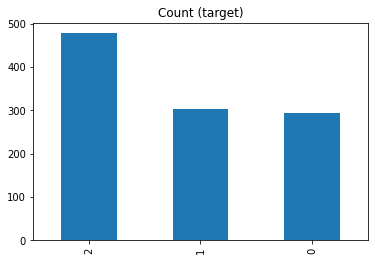

In [4]:
print("csr = 0\nbsr = 1")
tmp = train_raw.label.value_counts()
print(tmp)
print('Proportion:', round(tmp[2] / tmp[1], 2), ': 1')

tmp.plot(kind='bar', title='Count (target)');

## resample (data balance)

csr = 0
bsr = 1
1    303
0    294
2    265
Name: label, dtype: int64
Proportion: 0.97 : 1


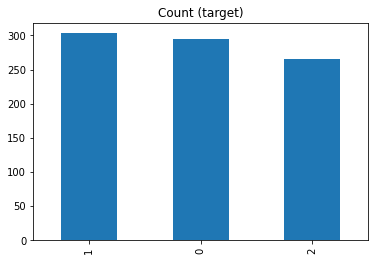

In [189]:
from sklearn.utils import resample
# # Separate majority and minority classes
df_majority = train_raw[train_raw.label==2]
df_minority = train_raw[train_raw.label==1]
df_middle = train_raw[train_raw.label==0]
 
# Upsample minority class
df_minority_upsampled = resample(df_majority, 
                                 replace=False,     # sample with replacement
                                 n_samples=265,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
# train_raw = pd.concat([df_majority, df_minority_upsampled])
train_raw = pd.concat([df_minority_upsampled, df_minority,df_middle])
# Display new class counts
tmp = train_raw.label.value_counts()
print("csr = 0\nbsr = 1")
print(tmp)
print('Proportion:', round(tmp[0] / tmp[1], 2), ': 1')
tmp.plot(kind='bar', title='Count (target)');

In [5]:
train_raw.head()

,height,width,nnz,avg_row,std_row,avg_bsp,std_bsp,s_blk,s_ratio,label
0,5045,2022,3566338,0.650393,0.010779,0.650373,0.081681,0,0.349607,0
1,5045,2022,1425907,0.860219,0.007647,0.755285,0.126921,3762,0.151582,1
2,5045,2022,9011901,0.116566,0.007056,0.542372,0.320021,3762,0.895235,2
3,5045,2022,5920044,0.419660,0.010870,0.511692,0.285349,3762,0.592141,2
4,5045,2022,2907982,0.714931,0.010116,0.552350,0.270095,3769,0.296892,0


## Processing Raw Data

In [7]:
# X = train_raw.drop(columns=['label', 'std_row','s_blk', 'height', 'width'])
X = train_raw.drop(columns=['label'])
Y = train_raw.label

X.head()
X.shape

(1075, 9)

(1075, 9)
(752, 9)


/home/hhliao/.local/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:07:12] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 1) avg_row                        0.433522
 2) width                          0.082235
 3) s_ratio                        0.080851
 4) s_blk                          0.070818
 5) std_row                        0.068921
 6) height                         0.068123
 7) std_bsp                        0.067916
 8) avg_bsp                        0.063883
 9) nnz                            0.063731


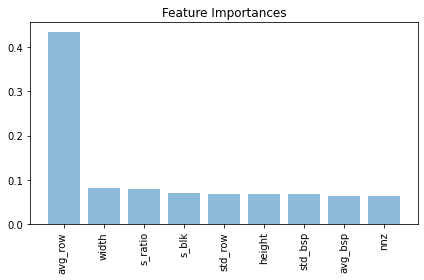

In [13]:
sc_x = StandardScaler()
X_std = sc_x.fit_transform(X)
    
# print(new_X)    
X_train, X_test, y_train, y_test = train_test_split(X_std, Y, test_size=0.3, random_state=0)
print(X.shape)
print(X_train.shape)
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
forest = XGBClassifier()
forest.fit(X_train, y_train)


# calculate for feature importance
importances = forest.feature_importances_
# get sort indices in descending order
indices = np.argsort(importances)[::-1]
features = []

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            train_raw.columns.values[indices[f]], 
                            importances[indices[f]]))
    features.append(train_raw.columns.values[indices[f]])


plt.figure()
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]),
        importances[indices],
        align='center',
        alpha=0.5)

plt.xticks(range(X_train.shape[1]), 
           train_raw.columns.values[indices], rotation=90)
plt.tight_layout()
plt.show()

In [204]:
# X=X.drop(columns=['s_blk', 'avg_bsp', 'avg_row','s_ratio'])
X=X.drop(columns=['s_blk', 's_ratio', 'avg_row'])

In [217]:
sc_x = StandardScaler()
X_std = sc_x.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_std, Y, test_size=0.36, random_state=0)

X_train.shape

(688, 9)

### define plot function  

In [218]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_test, test_pred):
    tn, fp, fn, tp ,a,b,c,d,e= confusion_matrix(y_test, test_pred).ravel()
    print((tn, fp, fn, tp,a,b,c,d,e))
    labels = ['csr', 'bsr','nor']

    cm = confusion_matrix(y_test, test_pred, [0,1,2])
    print(cm)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(cm, cmap='summer')
    for (i, j), z in np.ndenumerate(cm):
        ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

    plt.title('Confusion matrix of the classifier')
    fig.colorbar(cax)
    ax.set_xticklabels([''] + labels)
    ax.set_yticklabels([''] + labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

## Using all features

### Logistic Regression

(688, 9)
(387, 9)
MSE train: 0.46, valid: 0.52
Train Accuracy : 0.65
Test Accuracy : 0.61
0.6098191214470284
Counter({2: 178, 1: 143, 0: 66})
(24, 66, 13, 38, 55, 8, 4, 22, 157)
[[ 24  66  13]
 [ 38  55   8]
 [  4  22 157]]


/home/hhliao/.local/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass labels=[0, 1, 2] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
/home/hhliao/.local/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
/home/hhliao/.local/lib/python3.7/site-packages/ipykernel_launcher.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator


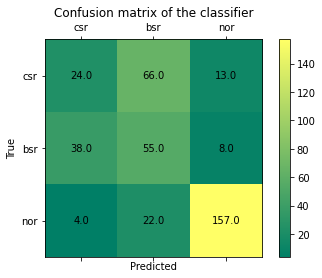

F1 score : 0.53


In [219]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

print(X_train.shape)
print(X_test.shape)

train_pred = lr.predict(X_train)
test_pred = lr.predict(X_test)

from sklearn.metrics import mean_squared_error
print('MSE train: %.2f, valid: %.2f' % (mean_squared_error(y_train, train_pred),mean_squared_error(y_test, test_pred)))
from sklearn.metrics import accuracy_score
print('Train Accuracy : %.2f' % accuracy_score(y_train, train_pred))
print('Test Accuracy : %.2f' % accuracy_score(y_test, test_pred))
print(lr.score(X_test, y_test))
pred = np.round(lr.predict_proba(X_test),3)
print(collections.Counter(test_pred))
filename = 'LR.sav'
pickle.dump(lr, open(filename, 'wb'))
plot_confusion_matrix(y_test, test_pred)
from sklearn.metrics import plot_roc_curve, f1_score
print('F1 score : %.2f' % f1_score(y_test, test_pred, average='macro'))

# rfc_disp = plot_roc_curve(rfc, X_test, y_test, ax=svc_disp.ax_)

In [146]:
svc_disp = plot_roc_curve(lr, X_test, y_test)
plt.show()

ValueError: LogisticRegression should be a binary classifier

### SVC

(688, 6)
(387, 6)
MSE train: 0.51, valid: 0.58
Train Accuracy : 0.64
Test Accuracy : 0.63
Counter({2: 184, 1: 106, 0: 97})
(39, 49, 15, 46, 46, 9, 12, 11, 160)
[[ 39  49  15]
 [ 46  46   9]
 [ 12  11 160]]


/home/hhliao/.local/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass labels=[0, 1, 2] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
/home/hhliao/.local/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
/home/hhliao/.local/lib/python3.7/site-packages/ipykernel_launcher.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator


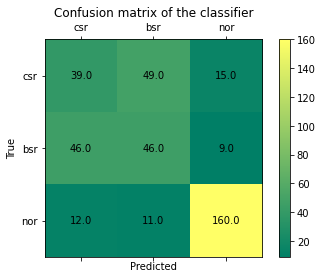

F1 score : 0.57


In [208]:
from sklearn.svm import SVC
lr = SVC(kernel='linear', 
            class_weight='balanced', # penalize
            probability=True)
lr.fit(X_train, y_train)

print(X_train.shape)
print(X_test.shape)

train_pred = lr.predict(X_train)
test_pred = lr.predict(X_test)

from sklearn.metrics import mean_squared_error
print('MSE train: %.2f, valid: %.2f' % (mean_squared_error(y_train, train_pred),mean_squared_error(y_test, test_pred)))
from sklearn.metrics import accuracy_score
print('Train Accuracy : %.2f' % accuracy_score(y_train, train_pred))
print('Test Accuracy : %.2f' % accuracy_score(y_test, test_pred))
print(collections.Counter(test_pred))
filename = 'SVC.sav'
pickle.dump(lr, open(filename, 'wb'))
plot_confusion_matrix(y_test, test_pred)
print('F1 score : %.2f' % f1_score(y_test, test_pred, average='macro'))

### xgboost

/home/hhliao/.local/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/hhliao/.local/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass labels=[0, 1, 2] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
/home/hhliao/.local/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
/home/hhliao/.local/lib/python3.7/site-packages/ipykernel_launcher.py:19: UserWarning: FixedFormatter should only be

[21:22:51] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
MSE train: 0.00, valid: 0.39
Train Accuracy : 1.00
Test Accuracy : 0.68
Accuracy: 68.48%
Counter({2: 176, 1: 135, 0: 76})
(34, 65, 4, 36, 62, 3, 6, 8, 169)
[[ 34  65   4]
 [ 36  62   3]
 [  6   8 169]]


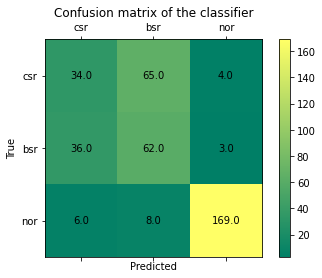

F1 score : 0.62


<Figure size 14400x14400 with 0 Axes>

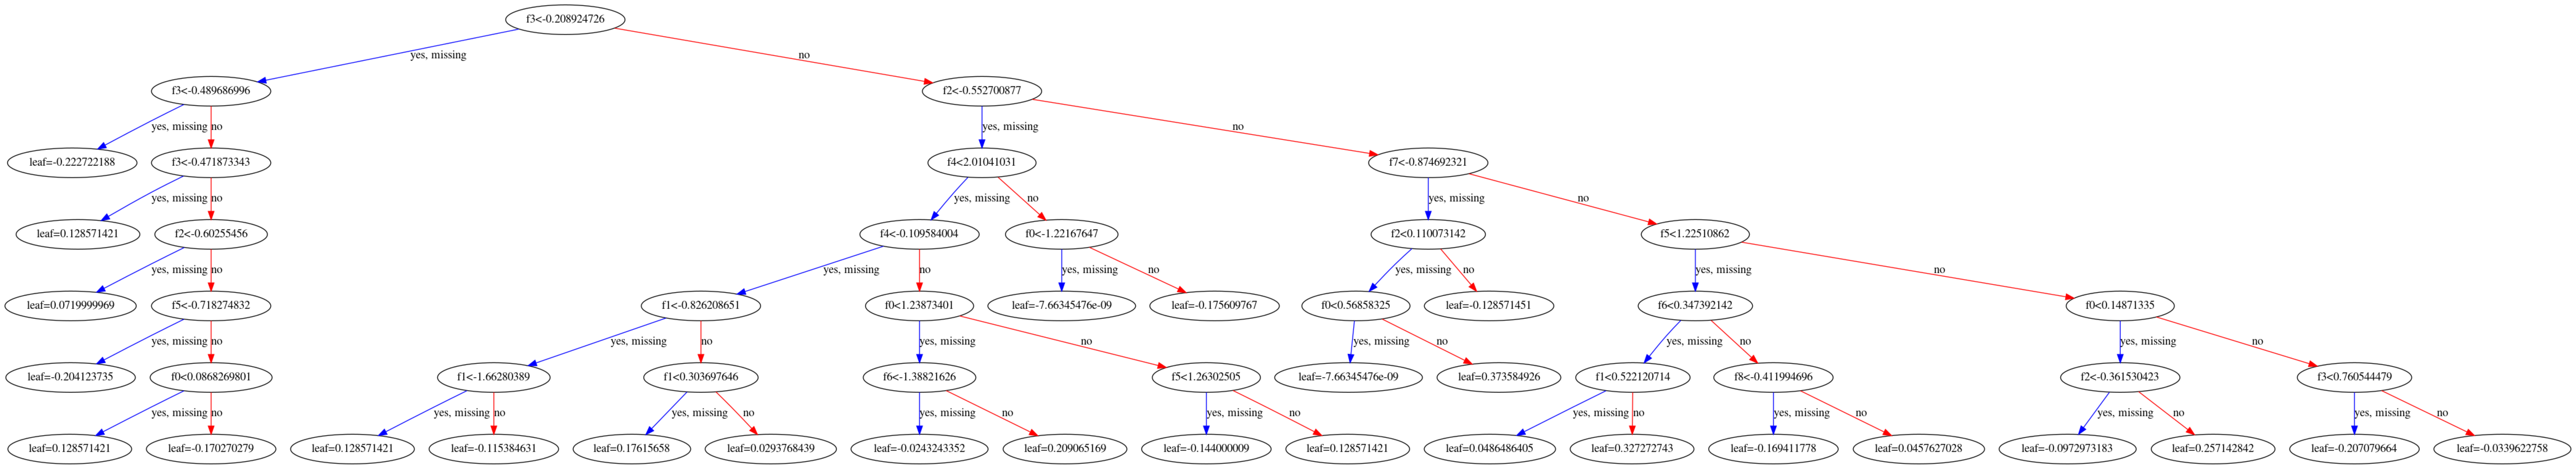

In [220]:
from xgboost import XGBClassifier
lr = XGBClassifier()
lr.fit(X_train, y_train)
train_pred = lr.predict(X_train)
test_pred = lr.predict(X_test)

accuracy = accuracy_score(y_test, test_pred)
print('MSE train: %.2f, valid: %.2f' % (mean_squared_error(y_train, train_pred),mean_squared_error(y_test, test_pred)))
from sklearn.metrics import accuracy_score
print('Train Accuracy : %.2f' % accuracy_score(y_train, train_pred))
print('Test Accuracy : %.2f' % accuracy_score(y_test, test_pred))
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(collections.Counter(test_pred))
filename = 'XGB.sav'
pickle.dump(lr, open(filename, 'wb'))
plot_confusion_matrix(y_test, test_pred)
print('F1 score : %.2f' % f1_score(y_test, test_pred, average='macro'))
from xgboost import plot_tree
plt.figure(figsize=(200,200))
plot_tree(lr ,feature_names=['height','width','nnz','avg_row','std_row']) 
fig = plt.gcf()
fig.set_size_inches(200, 200)
plt.show()


### Decision Tree

(688, 6)
(387, 6)
MSE train: 0.66, valid: 0.73
Train Accuracy : 0.62
Test Accuracy : 0.62
0.6227390180878553
Counter({0: 216, 2: 166, 1: 5})
(89, 2, 12, 93, 3, 5, 34, 0, 149)
[[ 89   2  12]
 [ 93   3   5]
 [ 34   0 149]]


/home/hhliao/.local/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass labels=[0, 1, 2] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
/home/hhliao/.local/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
/home/hhliao/.local/lib/python3.7/site-packages/ipykernel_launcher.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator


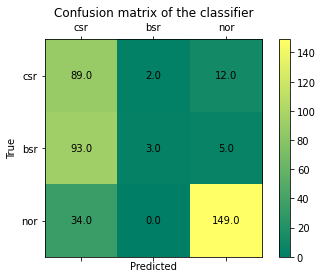

F1 score : 0.49


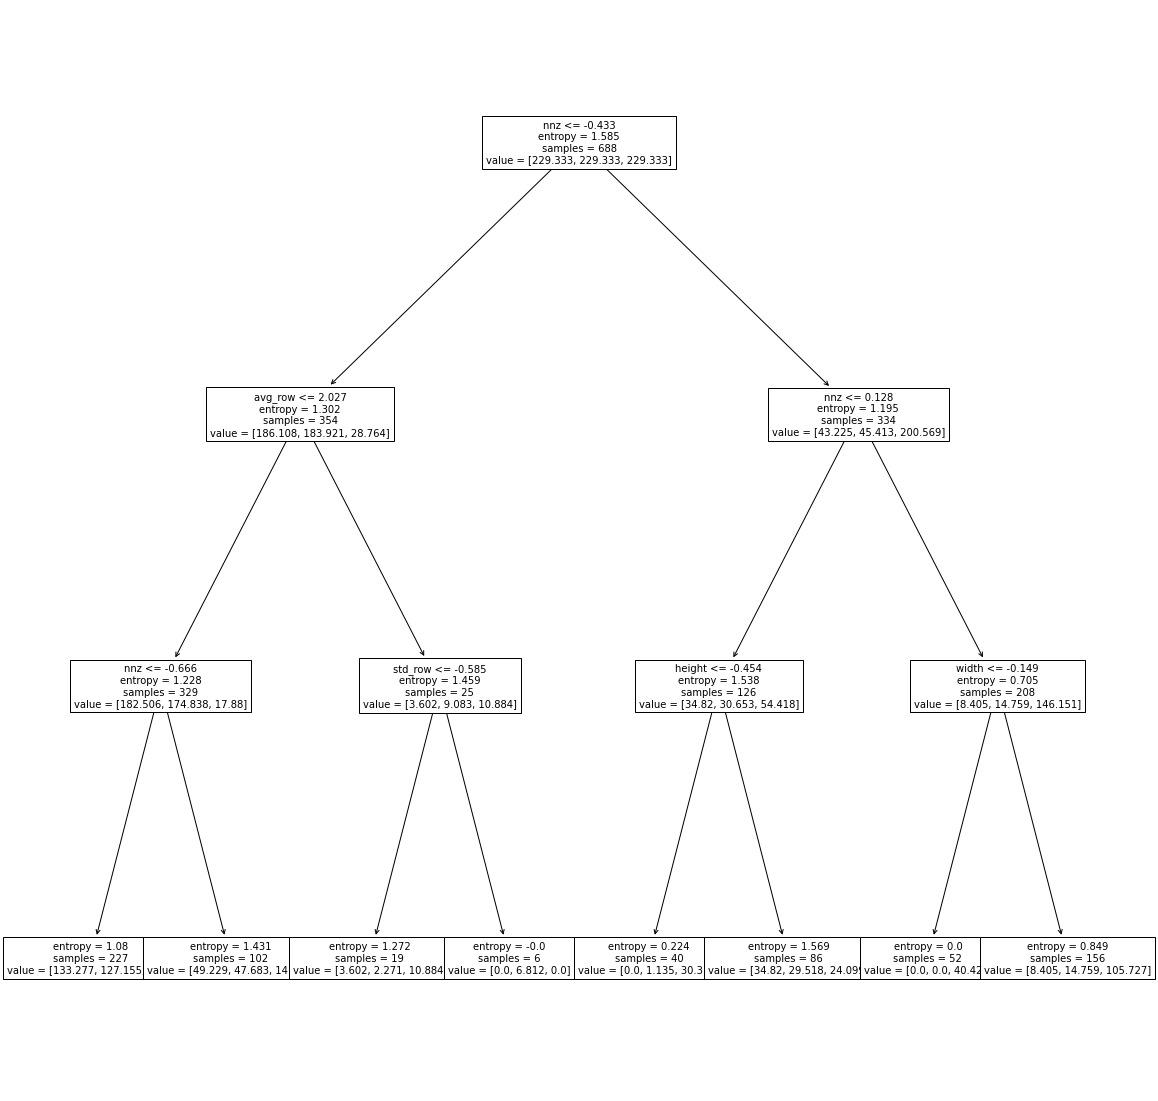

In [210]:
# Train and Inference with Logistic Regression
lr = tree.DecisionTreeClassifier(criterion='entropy',max_depth=3, class_weight='balanced')
lr.fit(X_train, y_train)

print(X_train.shape)
print(X_test.shape)

train_pred = lr.predict(X_train)
test_pred = lr.predict(X_test)

from sklearn.metrics import mean_squared_error
print('MSE train: %.2f, valid: %.2f' % (mean_squared_error(y_train, train_pred),mean_squared_error(y_test, test_pred)))
from sklearn.metrics import accuracy_score
print('Train Accuracy : %.2f' % accuracy_score(y_train, train_pred))
print('Test Accuracy : %.2f' % accuracy_score(y_test, test_pred))
print(lr.score(X_test, y_test))
pred = np.round(lr.predict_proba(X_test),3)
print(collections.Counter(test_pred))
filename = 'DT.sav'
pickle.dump(lr, open(filename, 'wb'))
plot_confusion_matrix(y_test, test_pred)
print('F1 score : %.2f' % f1_score(y_test, test_pred, average='macro'))
from sklearn.tree import export_graphviz
# export_graphviz(lr, out_file='tree.dot', feature_names=['height','width','nnz','avg_row','std_row'])
plt.figure(figsize=(20,20))
tree.plot_tree(lr ,feature_names=['height','width','nnz','avg_row','std_row','avg_bsp','std_bsp','s_blk','s_ratio'], fontsize=10) 
plt.show()

### Gradient Boosting

(688, 6)
(387, 6)
MSE train: 0.11, valid: 0.46
Train Accuracy : 0.94
Test Accuracy : 0.69
0.689922480620155
Counter({2: 181, 1: 124, 0: 82})
(40, 53, 10, 33, 62, 6, 9, 9, 165)
[[ 40  53  10]
 [ 33  62   6]
 [  9   9 165]]


/home/hhliao/.local/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass labels=[0, 1, 2] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
/home/hhliao/.local/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
/home/hhliao/.local/lib/python3.7/site-packages/ipykernel_launcher.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator


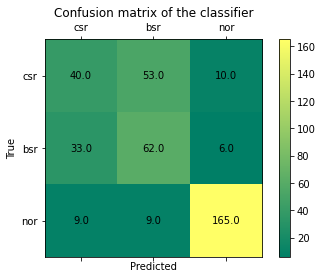

F1 score : 0.63


In [211]:
# Train and Inference with Logistic Regression
from sklearn.ensemble import GradientBoostingClassifier
lr = GradientBoostingClassifier()
# lr = GradientBoostingClassifier(n_estimators=5, learning_rate=0.67, max_depth=1, random_state=0)
# lr = LogisticRegression()
lr.fit(X_train, y_train)


# print(lr.coef_)
# print(lr.intercept_ )

print(X_train.shape)
print(X_test.shape)

train_pred = lr.predict(X_train)
test_pred = lr.predict(X_test)

from sklearn.metrics import mean_squared_error
print('MSE train: %.2f, valid: %.2f' % (mean_squared_error(y_train, train_pred),mean_squared_error(y_test, test_pred)))
from sklearn.metrics import accuracy_score
print('Train Accuracy : %.2f' % accuracy_score(y_train, train_pred))
print('Test Accuracy : %.2f' % accuracy_score(y_test, test_pred))
print(lr.score(X_test, y_test))
pred = np.round(lr.predict_proba(X_test),3)
print(collections.Counter(test_pred))
filename = 'GB.sav'
pickle.dump(lr, open(filename, 'wb'))
plot_confusion_matrix(y_test, test_pred)
print('F1 score : %.2f' % f1_score(y_test, test_pred, average='macro'))

### KNN

(688, 6)
(387, 6)
MSE train: 0.35, valid: 0.56
Train Accuracy : 0.75
Test Accuracy : 0.65
Counter({2: 171, 0: 117, 1: 99})
(50, 45, 8, 48, 46, 7, 19, 8, 156)
[[ 50  45   8]
 [ 48  46   7]
 [ 19   8 156]]


/home/hhliao/.local/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass labels=[0, 1, 2] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
/home/hhliao/.local/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
/home/hhliao/.local/lib/python3.7/site-packages/ipykernel_launcher.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator


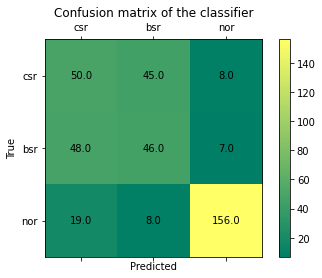

F1 score : 0.60


In [212]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
lr = KNeighborsClassifier(algorithm='kd_tree')
# lr = BaggingClassifier(KNeighborsClassifier(algorithm='kd_tree'), max_samples=0.2, max_features=0.3)
lr.fit(X_train, y_train)

print(X_train.shape)
print(X_test.shape)

train_pred = lr.predict(X_train)
test_pred = lr.predict(X_test)

from sklearn.metrics import mean_squared_error
print('MSE train: %.2f, valid: %.2f' % (mean_squared_error(y_train, train_pred),mean_squared_error(y_test, test_pred)))
from sklearn.metrics import accuracy_score
print('Train Accuracy : %.2f' % accuracy_score(y_train, train_pred))
print('Test Accuracy : %.2f' % accuracy_score(y_test, test_pred))
print(collections.Counter(test_pred))
filename = 'BG.sav'
pickle.dump(lr, open(filename, 'wb'))
plot_confusion_matrix(y_test, test_pred)
print('F1 score : %.2f' % f1_score(y_test, test_pred, average='macro'))

### Random Forest

(688, 9)
(387, 9)
MSE train: 0.32, valid: 0.63
Train Accuracy : 0.76
Test Accuracy : 0.59
Counter({2: 165, 0: 119, 1: 103})
(43, 49, 11, 58, 38, 5, 18, 16, 149)
[[ 43  49  11]
 [ 58  38   5]
 [ 18  16 149]]


/home/hhliao/.local/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass labels=[0, 1, 2] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
/home/hhliao/.local/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
/home/hhliao/.local/lib/python3.7/site-packages/ipykernel_launcher.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator


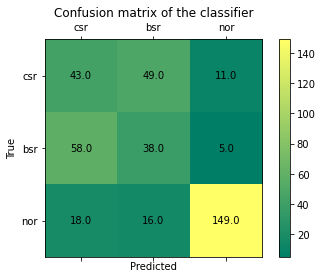

F1 score : 0.54


In [24]:
forest = RandomForestClassifier(criterion='entropy',
                                n_estimators=5, 
                                random_state=0,
                                n_jobs=4)
forest.fit(X_train, y_train)

print(X_train.shape)
print(X_test.shape)

train_pred = lr.predict(X_train)
test_pred = lr.predict(X_test)

from sklearn.metrics import mean_squared_error
print('MSE train: %.2f, valid: %.2f' % (mean_squared_error(y_train, train_pred),mean_squared_error(y_test, test_pred)))
from sklearn.metrics import accuracy_score
print('Train Accuracy : %.2f' % accuracy_score(y_train, train_pred))
print('Test Accuracy : %.2f' % accuracy_score(y_test, test_pred))
print(collections.Counter(test_pred))
filename = 'RF.sav'
pickle.dump(lr, open(filename, 'wb'))
plot_confusion_matrix(y_test, test_pred)
print('F1 score : %.2f' % f1_score(y_test, test_pred, average='macro'))

## Select Top-3 features

(2080, 9)
(1456, 9)
 1) avg_bsp                        0.135098
 2) avg_row                        0.134831
 3) std_bsp                        0.132287
 4) nnz                            0.131865
 5) s_ratio                        0.118419
 6) std_row                        0.114480
 7) s_blk                          0.113616
 8) height                         0.063630
 9) width                          0.055776


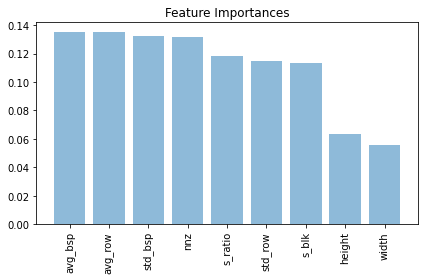

['std_row', 's_blk', 'height', 'width']


<bound method NDFrame.head of           nnz   avg_row   avg_bsp   std_bsp    s_ratio  label
0      122250  0.982816  0.982835  0.022307   1.122510      1
1      567942  0.920169  0.951500  0.048068   1.302752      0
2     2212493  0.689009  0.864011  0.137654   1.533913      0
3     2127913  0.700897  0.823253  0.143990   1.522024      1
4       39761  0.994411  0.857483  0.145965   2.872253      0
...       ...       ...       ...       ...        ...    ...
2075   967796  0.940128  0.928048  0.058371  40.387000      1
2076   869406  0.946215  0.928208  0.058251  40.684982      0
2077  1243598  0.923065  0.928163  0.058155  40.839640      1
2078     6754  0.999582  0.928782  0.058281  42.732269      1
2079  1782342  0.889736  0.928447  0.058355  42.879711      0

[2080 rows x 6 columns]>

In [105]:
# Random Forest
# train_raw = pd.read_csv('./raw_dict/sp_random_gen_new_sort_random.csv')
train_raw = pd.read_csv('./raw_dict/bsp_up75_random_gen_new_sort_random.csv')
train_raw = train_raw.drop(columns=['name'])
hold = train_raw
train_raw.head()
X = train_raw.drop(columns=['label'])
y = train_raw.label

X.head()
X.shape

# y = y_train_R['FGM'].values

sc_x = StandardScaler()
X_std = sc_x.fit_transform(X)
    
# print(new_X)    
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.3, random_state=0)
print(X.shape)
print(X_train.shape)

forest = RandomForestClassifier(criterion='entropy',
                                n_estimators=20, 
                                random_state=1,
                                n_jobs=2)
forest.fit(X_train, y_train)


# calculate for feature importance
importances = forest.feature_importances_
# get sort indices in descending order
indices = np.argsort(importances)[::-1]
features = []

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            train_raw.columns.values[indices[f]], 
                            importances[indices[f]]))
    features.append(train_raw.columns.values[indices[f]])


plt.figure()
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]),
        importances[indices],
        align='center',
        alpha=0.5)

plt.xticks(range(X_train.shape[1]), 
           train_raw.columns.values[indices], rotation=90)
plt.tight_layout()
# plt.savefig('./output/fig-forest-feature-importances.png', dpi=300)
plt.show()

# delete unimportant features
unimportant_feature = []
feature_threshold = 0.111


unimportant_feature.extend(features[5:])
print(unimportant_feature)
X = hold.drop(columns=unimportant_feature)
Y = hold.label
X.head
        
# for f in range(X_train.shape[1]):
#     if f > 2:
#         train_raw = train_raw.drop(columns=features[f])
    
# X = train_raw.iloc[:, :].values

# # y = y_train_R['FGM'].values

# sc_x = StandardScaler()
# X_std = sc_x.fit_transform(X)
    
# # print(new_X)    
# X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.3, random_state=0)
# print(X.shape)
# print(X_train.shape)
# forest.fit(X_train, y_train)


# y_pred = forest.predict(X_test)
# print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
# print('Accuracy per feature: %.2f' % (accuracy_score(y_test, y_pred)/X.shape[1]))

In [18]:
# Model Evaluate

# lr=LogisticRegression()
# lr.fit(X_train, y_train)

# # calculate for feature importance
# feature_importance  = abs(lr.coef_[0])
# feature_importance = 100.0 * (feature_importance / feature_importance.max())
# sorted_idx = np.argsort(feature_importance)[::-1]
# pos = np.arange(sorted_idx.shape[0]) + .5
# print(sorted_idx)
# print(feature_importance[sorted_idx])
# print(train_raw.columns[sorted_idx])

# featfig = plt.figure()
# featax = featfig.add_subplot(1, 1, 1)
# featax.barh(pos, feature_importance[sorted_idx], align='center')
# featax.set_yticks(pos)
# featax.set_yticklabels(train_raw.columns[sorted_idx], fontsize=8)
# featax.set_xlabel('Relative Feature Importance')

# plt.tight_layout()   
# plt.show()

In [28]:
# Model Extraction to top-3 imporatant features 

# features = np.array(X.columns)[sorted_idx]
# important_feature = features[:3]
        
# for feature in features:
#     if feature not in important_feature:
#         X = X.drop(columns=[feature])
X.head()

,nnz,avg_row,avg_bsp,std_bsp,s_ratio,label
0,122250,0.982816,0.982835,0.022307,1.122510,1
1,567942,0.920169,0.951500,0.048068,1.302752,0
2,2212493,0.689009,0.864011,0.137654,1.533913,0
3,2127913,0.700897,0.823253,0.143990,1.522024,1
4,39761,0.994411,0.857483,0.145965,2.872253,0


In [106]:
sc_x = StandardScaler()
X_std = sc_x.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_std, Y, test_size=0.3, random_state=0)

X_train.shape

(1456, 6)

In [107]:
# Train and Inference with Logistic Regression
# lr = DecisionTreeClassifier()
lr = LogisticRegression()
lr.fit(X_train, y_train)

print(X_train.shape)
print(X_test.shape)

train_pred = lr.predict(X_train)
test_pred = lr.predict(X_test)

from sklearn.metrics import mean_squared_error
print('MSE train: %.2f, valid: %.2f' % (mean_squared_error(y_train, train_pred),mean_squared_error(y_test, test_pred)))
from sklearn.metrics import accuracy_score
print('Train Accuracy : %.2f' % accuracy_score(y_train, train_pred))
print('Test Accuracy : %.2f' % accuracy_score(y_test, test_pred))
print(lr.score(X_test, y_test))
pred = np.round(lr.predict_proba(X_test),3)
print(collections.Counter(test_pred))
plot_confusion_matrix(y_test, test_pred)

(1456, 6)
(624, 6)
MSE train: 0.00, valid: 0.00
Train Accuracy : 1.00
Test Accuracy : 1.00
1.0
Counter({1: 346, 0: 278})


/home/hhliao/.local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


ValueError: not enough values to unpack (expected 9, got 4)

(1456, 6)
(624, 6)
MSE train: 0.00, valid: 0.00
Train Accuracy : 1.00
Test Accuracy : 1.00
1.0
Counter({1: 346, 0: 278})
(278, 0, 0, 346)
[[278   0]
 [  0 346]]


/home/hhliao/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
/home/hhliao/.local/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator


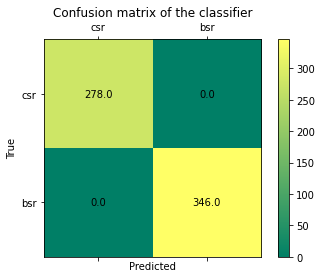

In [22]:
lr = DecisionTreeClassifier()
lr.fit(X_train, y_train)

print(X_train.shape)
print(X_test.shape)

train_pred = lr.predict(X_train)
test_pred = lr.predict(X_test)

from sklearn.metrics import mean_squared_error
print('MSE train: %.2f, valid: %.2f' % (mean_squared_error(y_train, train_pred),mean_squared_error(y_test, test_pred)))
from sklearn.metrics import accuracy_score
print('Train Accuracy : %.2f' % accuracy_score(y_train, train_pred))
print('Test Accuracy : %.2f' % accuracy_score(y_test, test_pred))
print(lr.score(X_test, y_test))
pred = np.round(lr.predict_proba(X_test),3)
print(collections.Counter(test_pred))
plot_confusion_matrix(y_test, test_pred)

(1456, 6)
(624, 6)
MSE train: 0.00, valid: 0.00
Train Accuracy : 1.00
Test Accuracy : 1.00
1.0
Counter({1: 346, 0: 278})
(278, 0, 0, 346)
[[278   0]
 [  0 346]]


/home/hhliao/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
/home/hhliao/.local/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator


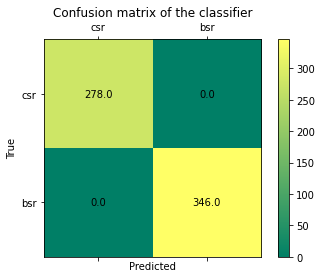

In [23]:
# Train and Inference with Logistic Regression
from sklearn.ensemble import GradientBoostingClassifier
lr = GradientBoostingClassifier(n_estimators=3, learning_rate=0.67, max_depth=1, random_state=0)
# lr = LogisticRegression()
lr.fit(X_train, y_train)

print(X_train.shape)
print(X_test.shape)

train_pred = lr.predict(X_train)
test_pred = lr.predict(X_test)

from sklearn.metrics import mean_squared_error
print('MSE train: %.2f, valid: %.2f' % (mean_squared_error(y_train, train_pred),mean_squared_error(y_test, test_pred)))
from sklearn.metrics import accuracy_score
print('Train Accuracy : %.2f' % accuracy_score(y_train, train_pred))
print('Test Accuracy : %.2f' % accuracy_score(y_test, test_pred))
print(lr.score(X_test, y_test))
pred = np.round(lr.predict_proba(X_test),3)
print(collections.Counter(test_pred))
# filename = 'GBC.sav'
# pickle.dump(lr, open(filename, 'wb'))
plot_confusion_matrix(y_test, test_pred)

(1456, 6)
(624, 6)
MSE train: 0.00, valid: 0.01
Train Accuracy : 1.00
Test Accuracy : 0.99
Counter({1: 351, 0: 273})
(273, 5, 0, 346)
[[273   5]
 [  0 346]]


/home/hhliao/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
/home/hhliao/.local/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator


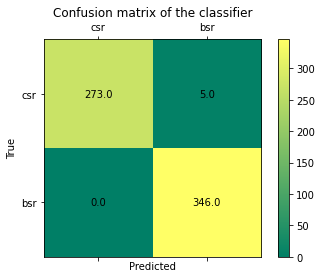

In [24]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
lr = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5)
lr.fit(X_train, y_train)

print(X_train.shape)
print(X_test.shape)

train_pred = lr.predict(X_train)
test_pred = lr.predict(X_test)

from sklearn.metrics import mean_squared_error
print('MSE train: %.2f, valid: %.2f' % (mean_squared_error(y_train, train_pred),mean_squared_error(y_test, test_pred)))
from sklearn.metrics import accuracy_score
print('Train Accuracy : %.2f' % accuracy_score(y_train, train_pred))
print('Test Accuracy : %.2f' % accuracy_score(y_test, test_pred))
print(collections.Counter(test_pred))
plot_confusion_matrix(y_test, test_pred)

(1456, 6)
(624, 6)
MSE train: 0.00, valid: 0.01
Train Accuracy : 1.00
Test Accuracy : 0.99
Counter({1: 351, 0: 273})
(273, 5, 0, 346)
[[273   5]
 [  0 346]]


/home/hhliao/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
/home/hhliao/.local/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator


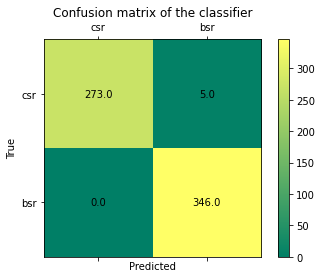

In [25]:
forest = RandomForestClassifier(criterion='entropy',
                                n_estimators=8, 
                                random_state=1,
                                n_jobs=4)
forest.fit(X_train, y_train)

print(X_train.shape)
print(X_test.shape)

train_pred = lr.predict(X_train)
test_pred = lr.predict(X_test)

from sklearn.metrics import mean_squared_error
print('MSE train: %.2f, valid: %.2f' % (mean_squared_error(y_train, train_pred),mean_squared_error(y_test, test_pred)))
from sklearn.metrics import accuracy_score
print('Train Accuracy : %.2f' % accuracy_score(y_train, train_pred))
print('Test Accuracy : %.2f' % accuracy_score(y_test, test_pred))
print(collections.Counter(test_pred))
plot_confusion_matrix(y_test, test_pred)

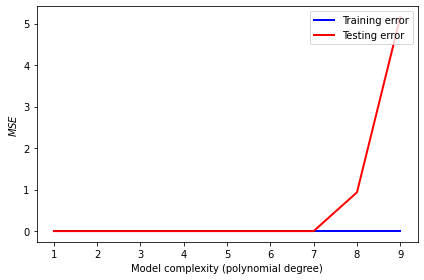

In [26]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
mse_train = []
mse_test = []

max_degree = 10

for d in range(1, max_degree):
    poly = PolynomialFeatures(degree=d)
    X_train_poly = poly.fit_transform(X_train[:,:])
    X_test_poly = poly.transform(X_test[:,:])
    
    regr = LinearRegression()
    regr = regr.fit(X_train_poly, y_train)
    y_train_pred = regr.predict(X_train_poly)
    y_test_pred = regr.predict(X_test_poly)
    
    mse_train.append(mean_squared_error(y_train, y_train_pred))
    mse_test.append(mean_squared_error(y_test, y_test_pred))
    

plt.plot(range(1, max_degree), mse_train, label = 'Training error', color = 'blue', linewidth = 2)
plt.plot(range(1, max_degree), mse_test, label = 'Testing error', color = 'red', linewidth = 2)
plt.legend(loc='upper right')
plt.xlabel('Model complexity (polynomial degree)')
plt.ylabel('$MSE$')
plt.tight_layout()
# plt.savefig('./output/fig-error-curve.png', dpi=300)
plt.show()